In [203]:
import pandas as pd

data = pd.read_csv('Cars93.csv')

### Drop unnecessary columns and empty values

In [204]:
# Engine Size is categorical
#data['EngineSize'] = data['EngineSize'].astype(object) 

data.drop(['Make','Man.trans.avail','Origin','AirBags','Unnamed: 0'],axis=1,inplace=True)
data.dropna(inplace=True)


### Create dummy variables for categorical values

In [205]:
data_dummy = pd.get_dummies(data.select_dtypes(include='object'),drop_first=True)

In [206]:
import sklearn.model_selection

# split dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_dummy,data['MPG.highway'],test_size=0.25,train_size=0.75,random_state=0)

In [207]:
from sklearn import linear_model

#linear regression
reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_predicted = reg.predict(X_test)

### Plotting

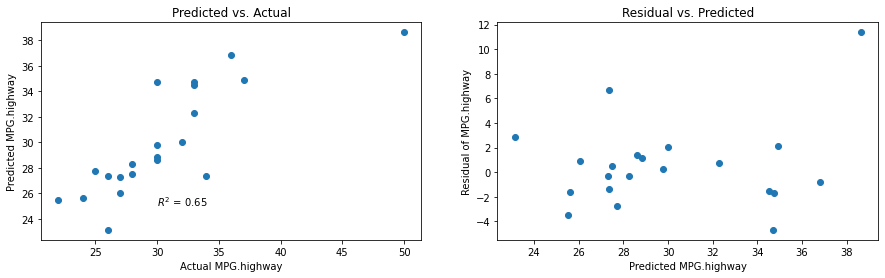

In [208]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2,figsize=(15,4))
ax[0].scatter(x=y_test,y=y_predicted)
ax[0].set_title('Predicted vs. Actual')
ax[0].set_xlabel('Actual MPG.highway')
ax[0].set_ylabel('Predicted MPG.highway')
#ax[0].set_ylim([20,55])
#ax[0].set_xlim([20,55])
#ax[0].plot(y_test, reg.intercept_ + reg.coef_ * y_test, label=line, color='red') #plot trend line
ax[0].text(30,25,f'$R^2$ = {round(reg.score(X_test,y_test),2)}') # print out R^2 values

#plot residual
residual = list(map(lambda x,y: x-y,y_test,y_predicted))
ax[1].scatter(x=y_predicted,y=residual)
ax[1].set_title('Residual vs. Predicted')
ax[1].set_xlabel('Predicted MPG.highway')
ax[1].set_ylabel('Residual of MPG.highway')

plt.show()

## Print equation using coefficients

In [209]:
str=[]
for i in range(len(reg.coef_)):
    str.append(f'{round(reg.coef_[i],2)}x{i}')
eq = f'y={round(reg.intercept_,2)}+'+ '+'.join(str)
eq

'y=29.84+-0.63x0+1.43x1+0.67x2+-1.45x3+2.08x4+0.59x5+-0.97x6+-2.67x7+-0.19x8+-0.07x9+3.07x10+3.33x11+-2.5x12+0.01x13+-1.03x14+-0.11x15+2.05x16+0.15x17+-1.92x18+-1.47x19+-0.24x20+1.09x21+0.0x22+1.75x23+-2.04x24+1.62x25+-0.42x26+3.72x27+0.14x28+-0.04x29+-0.51x30+0.35x31+-0.0x32+-0.21x33+0.18x34+1.42x35+1.87x36+-0.5x37+-0.0x38+-2.04x39+-2.4x40+-0.17x41+0.16x42+-0.58x43+0.0x44+0.14x45+-1.92x46+-1.78x47+3.84x48+0.0x49+1.61x50+7.91x51+0.9x52+0.59x53+-0.52x54+-0.0x55+1.84x56+-0.0x57+0.38x58+1.18x59+-0.82x60+-1.17x61+0.0x62+0.0x63+0.08x64+-3.27x65+0.0x66+0.0x67+-1.69x68+0.06x69+0.0x70+-1.38x71+0.14x72+-3.77x73+2.89x74+0.0x75+-1.11x76+4.48x77+0.0x78+0.0x79+-1.63x80+-3.32x81+-1.81x82+-0.39x83+0.0x84+-0.3x85+0.8x86+-0.04x87+-2.18x88+0.0x89+0.0x90+0.0x91+0.0x92+-0.93x93+-1.03x94+1.62x95+0.0x96+0.0x97+-0.63x98+-3.1x99+0.78x100+-0.41x101+-0.06x102+3.08x103+-1.57x104+-0.83x105+3.72x106+3.44x107+-3.0x108+0.0x109+0.41x110+1.37x111+-1.16x112+-1.35x113+4.69x114+-0.23x115+1.03x116+-0.54x117+-0.79x118+-0.5

In [220]:
sklearn.metrics.r2_score(y_test,y_predicted)

0.6510329309121636

In [222]:
reg.score(X_test,y_test)

0.6510329309121636

In [223]:
reg.score(X_train,y_train)

1.0